In [1]:
import pandas as pd

In [3]:
from util.const import ind_chem_tol_exp_cond_d


aledb_key_var_to_nscrpt_design = pd.read_pickle('./data/aledb_key_var_to_nscrpt_design.pkl')
aledb_key_var_to_nscrpt_design['condition'] = aledb_key_var_to_nscrpt_design['ALE experiment'].apply(lambda e: ind_chem_tol_exp_cond_d[e])
display(len(aledb_key_var_to_nscrpt_design), aledb_key_var_to_nscrpt_design.head())

114

,INSCRIPTA_EditType,INSCRIPTA_TargetType,INSCRIPTA_TargetName,INSCRIPTA_CoordinateType,INSCRIPTA_PositionType,INSCRIPTA_PositionValue,INSCRIPTA_SaturationReplacementType,INSCRIPTA_Control,INSCRIPTA_NumberOfCoordinatesToDelete,INSCRIPTA_InsertionSequence,INSCRIPTA_Comment,ALE experiment,effect,source,Inscripta DesignIds,condition
0,Substitution,Specific CDS,purT,Nucleotide,Specific Position,1097,,,,G,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836015, 9836014, 9836016}",butanediol
1,Substitution,Specific CDS,nanK,Nucleotide,Specific Position,382,,,,T,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836132, 9836131, 9836130}",butanediol
2,Substitution,Specific CDS,metJ,Nucleotide,Specific Position,16,,,,T,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,"{9836177, 9836178, 9836179}",butanediol
3,Substitution,Specific CDS,metJ,Nucleotide,Specific Position,80,,,,C,,"TOL_2,3-butanediol",nonsynonymous,ALEdb,{9843355},butanediol
4,Substitution,Specific CDS,relA,Nucleotide,Specific Position,116,,,,A,,"TOL_2,3-butanediol",truncation,ALEdb,{9843527},butanediol


In [4]:
ict_ale_var_designs = set()
for _, r in aledb_key_var_to_nscrpt_design.iterrows():
    ict_ale_var_designs |= r['Inscripta DesignIds']
len(ict_ale_var_designs)

166

# Get DCA results

In [5]:
import util.const as const
pd.set_option('display.max_columns', 500)

dca_df = pd.read_pickle('./data/dca_df.pkl')
dca_df['DesignId'] = dca_df['DesignId'].apply(lambda s: s.replace('GGY-A007_', ''))

# Don't want to inspect certain conditions
dca_df = dca_df[dca_df['condition'] != 'propanediol']
dca_df.head()

,DesignId,cvDesignEst,cvFit,cv,cvOutlier,baseMean,log2FoldChange,lfcSE,pvalue,padj,neg.log10padj,variant source,variant target,variant effect,EditType,AA positions,AA ref seq,AA seq change,is_overlap,Grantham score,Grantham category,condition,positive_signif,positive_norm_score,min_max_norm_score
0,9835899,0.0001,0.122469,0.107650,False,142.699254,-0.147376,0.155337,0.324006,0.509286,0.293039,ALEdb,relA,nonsynonymous,Substitution,{453},Y,C,True,194.0,radical,adipate,False,0.000000,0.414325
1,9835900,0.0001,0.095786,0.074417,False,457.645318,0.234263,0.102286,0.019719,0.055579,1.255091,ALEdb,relA,nonsynonymous,Substitution,{453},Y,C,True,194.0,radical,adipate,False,0.050744,0.461243
2,9835901,0.0001,0.135688,0.116120,False,101.690949,0.064120,0.171874,0.696564,0.824925,0.083586,ALEdb,relA,nonsynonymous,Substitution,{453},Y,C,True,194.0,radical,adipate,False,0.013889,0.440326
3,9835902,0.0001,0.090625,0.070824,False,720.246700,-0.192941,0.093270,0.035891,0.092580,1.033483,ALEdb,sapA,nonsynonymous,Substitution,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.408724
4,9835903,0.0001,0.092204,0.071572,False,614.453744,-0.107648,0.095533,0.252719,0.428408,0.368143,ALEdb,sapA,nonsynonymous,Substitution,{265},G,V,False,109.0,moderately radical,adipate,False,0.000000,0.419209


In [6]:
import util.util as util
import util.const as const

dca_df['predicted variant effect'] = dca_df.apply(util.get_predicted_variant_effect, axis=1)

var_eff_pal = const.GRANTHAM_CATEGORY_COLOR_PALETTE.copy()
var_eff_pal.update(const.PREDICTED_VARIANT_EFFECT_COLOR_PALETTE)

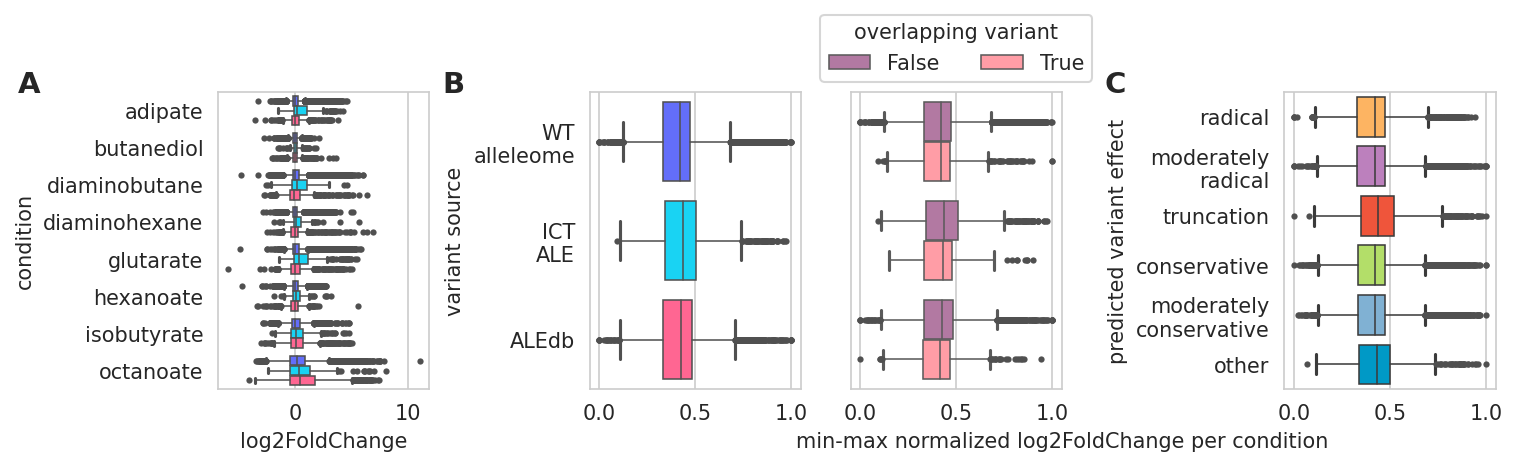

In [7]:
import seaborn as sns
import matplotlib.pyplot as mpl
mpl.rcParams["figure.dpi"] = 150
sns.set_style("whitegrid")


fig, axs = mpl.subplots(
    1,4,
    figsize=(10,3),
    layout="constrained"
    # gridspec_kw={'height_ratios': [1,5]},
)

pal = {
    'ALEdb':'#ff6692',
    'WT alleleome':'#636efa',
    'ICT ALE':'#19D3f3',
}

cond_order = ['adipate','butanediol','diaminobutane','diaminohexane','glutarate','hexanoate',
'isobutyrate', 'octanoate',
# 'propanediol'
]

lw = 0.75
bp = dict(linewidth=lw)
mp = dict(linewidth=lw)
wp = dict(linewidth=lw)
fp = dict(
    marker='o', markeredgecolor='none',
    markerfacecolor='#505050',  # Same color as boxplot outline
    markersize=3)

sns.boxplot(
    ax=axs[0], data=dca_df,
    x='log2FoldChange', y='condition', hue='variant source',
    hue_order=['WT alleleome', 'ICT ALE', 'ALEdb'],  # To match order with barplot
    palette = pal, saturation=1,
    boxprops = bp, medianprops = mp, flierprops = fp, order = cond_order, whiskerprops = wp)
axs[0].get_legend().remove()

var_src_order = ['WT alleleome', 'ICT ALE', 'ALEdb']
sns.boxplot(
    ax=axs[1], data=dca_df, x='min_max_norm_score', y='variant source',
    palette = pal, saturation=1,
    order = var_src_order,
    boxprops = bp, medianprops = mp, flierprops = fp, whiskerprops = wp)
axs[1].set_xlabel("")
axs[1].set_ylabel("variant source",
                #   labelpad=-10.0
                  )
# replace space with newline on y-axis tick labels to save space
labels = axs[1].get_yticklabels()
new_labels = [label.get_text().replace(' ', '\n') for label in labels]
axs[1].set_yticklabels(new_labels)

sns.boxplot(
    ax=axs[2], data=dca_df, x='min_max_norm_score', y='variant source', hue='is_overlap',
    palette = {False: '#B279A2', True: '#FF9DA6'}, saturation=1,
    order = var_src_order,
    boxprops = bp, medianprops = mp, flierprops = fp, whiskerprops = wp)
axs[2].yaxis.set_ticklabels([])
axs[2].set_ylabel("")
axs[2].set_xlabel('min-max normalized log2FoldChange per condition', x=1)
axs[2].legend(title='overlapping variant', loc='lower center', bbox_to_anchor=(0.5, 1), ncol=2)

sns.boxplot(
    ax=axs[3], data=dca_df, x='min_max_norm_score', y='predicted variant effect',
    palette = var_eff_pal, saturation=1,
    boxprops = bp, medianprops = mp, flierprops = fp, whiskerprops = wp)
axs[3].set_xlabel("")
# replace space with newline on y-axis tick labels to save space
labels = axs[3].get_yticklabels()
new_labels = [label.get_text().replace(' ', '\n') for label in labels]
axs[3].set_yticklabels(new_labels)

axs[0].text(-0.95, 1, 'A', transform=axs[0].transAxes, weight='bold', fontsize=14)
axs[1].text(-0.7, 1, 'B', transform=axs[1].transAxes, weight='bold', fontsize=14)
axs[3].text(-0.85, 1, 'C', transform=axs[3].transAxes, weight='bold', fontsize=14)

mpl.savefig("supp_f1abc.svg")